In [102]:
import os
import numpy as np
import cv2
import matplotlib.pylab as plt

In [103]:
image_path     = '../../../dataset/images'
training_path  = os.path.join(image_path, 'training')
original_path  = os.path.join(training_path, 'original')
processed_path = os.path.join(training_path, 'processed')

In [104]:
original  = [os.path.join(original_path, image) for image in os.listdir(original_path)]
processed = [os.path.join(original_path, image) for image in os.listdir(processed_path)]

**GET MIN SIZE**

In [18]:
minsize  = None
minshape = None
for image in original:
    data = cv2.imread(image)
    shape = data.shape
    size = shape[0]*shape[1]

    if (minsize == None)or(size < minsize):
        minshape = shape
        minsize  = size

**RESIZING**

In [19]:
for image in original:
    data = cv2.imread(image)
    resized = cv2.resize(data, minshape[:2], interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join(processed_path, os.path.basename(image)), resized)

**DETECCIÓN DE BORDES**

In [ ]:
# Cargar la imagen
image = cv2.imread(processed[0], cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(figsize = (5, 5))
ax.imshow(image, cmap='gray')
plt.show()

**DETECCIÓN DE BORDES SIN UMBRALIZACIÓN**

In [ ]:
for file in processed:
    image   = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    sobelx  = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=9)
    sobely  = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=9)

    # Calcular la magnitud del gradiente
    magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Normalizar la magnitud a valores entre 0 y 255
    magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    magnitude = np.uint8(magnitude)

    fig, ax = plt.subplots(figsize = (5, 5))

    ax.imshow(magnitude, cmap='gray')
    plt.show()

**DETECCIÓN DE BORDES CON LAPLACIAN FILTER**

In [ ]:
# Cargar la imagen
for file in processed:
    image   = cv2.imread(file)
    gray    = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicar el filtro Laplaciano
    laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=23)
    laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX)
    laplacian = np.uint8(laplacian)
    # Sumar la imagen original y el resultado del Laplaciano para obtener el sharpening

    # Visualizar la imagen original y la imagen con sharpening
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.imshow(laplacian, cmap='gray')
    plt.show()

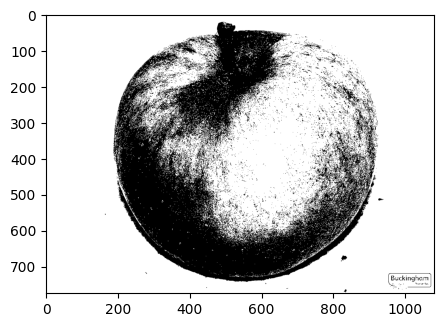

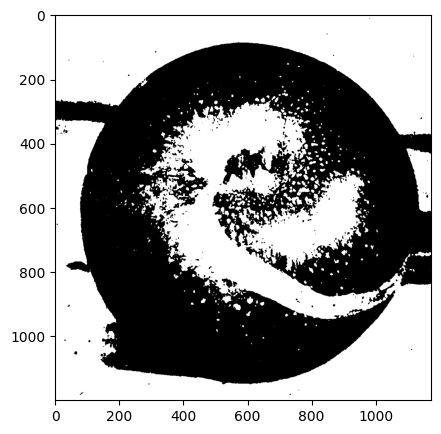

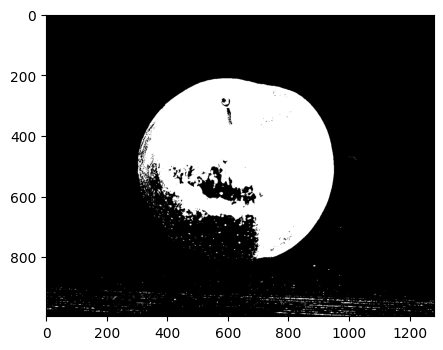

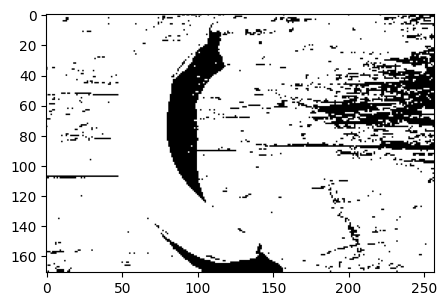

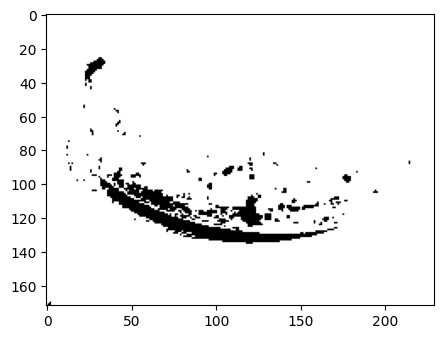

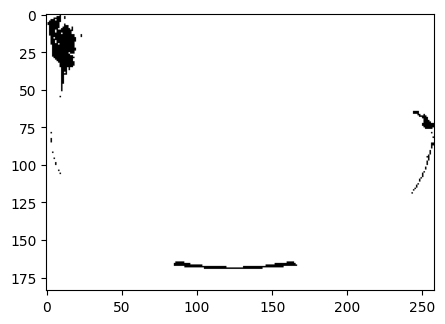

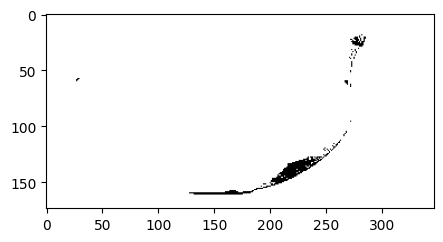

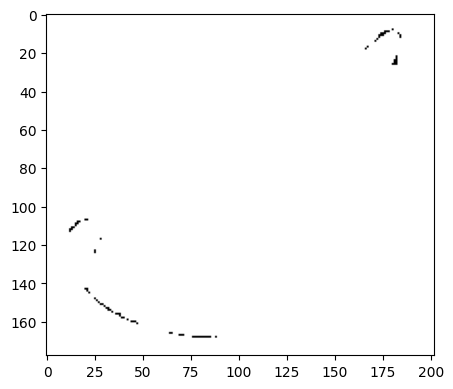

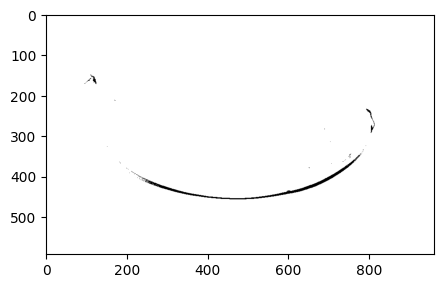

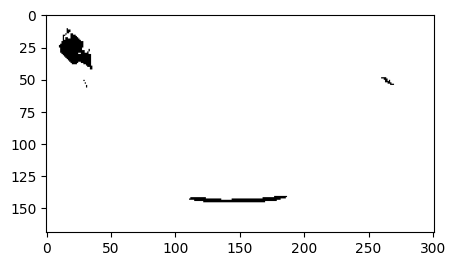

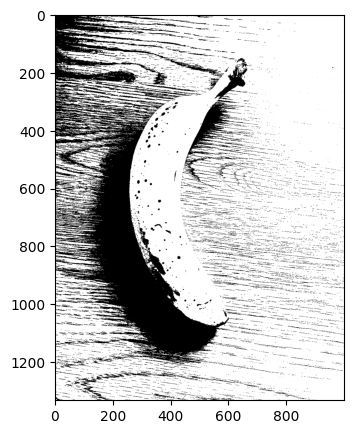

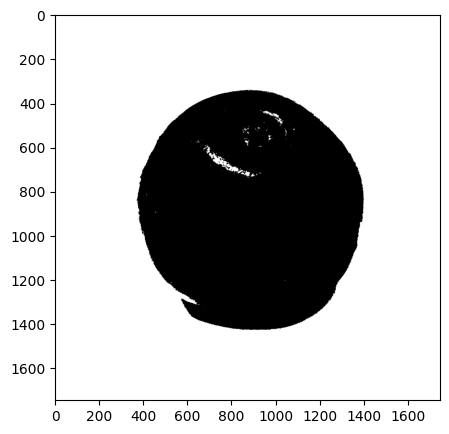

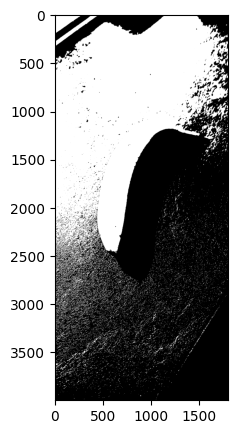

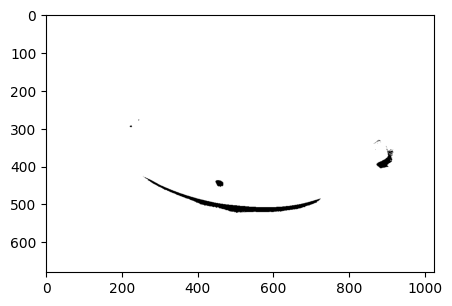

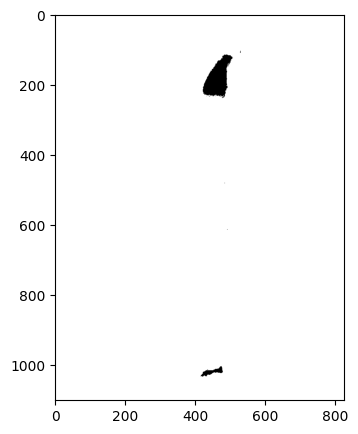

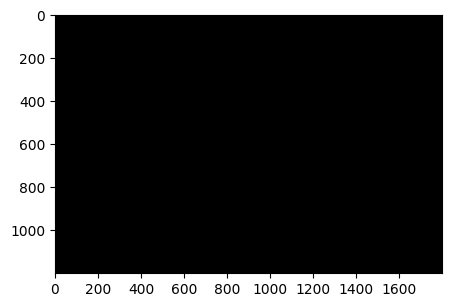

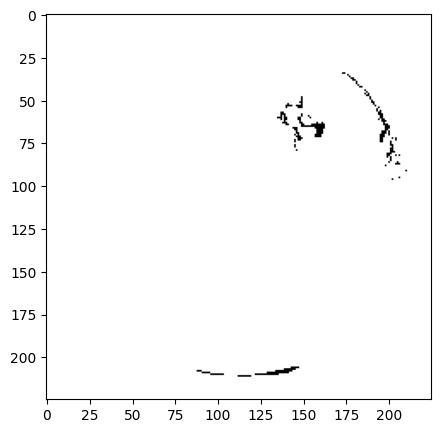

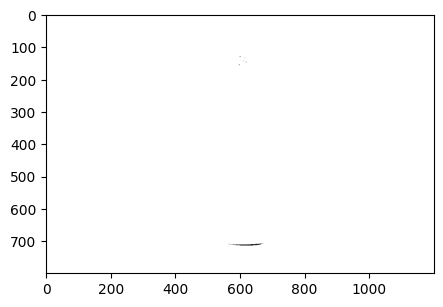

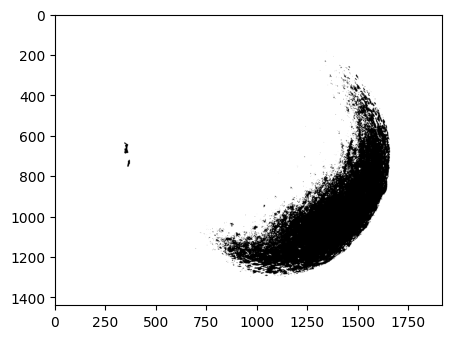

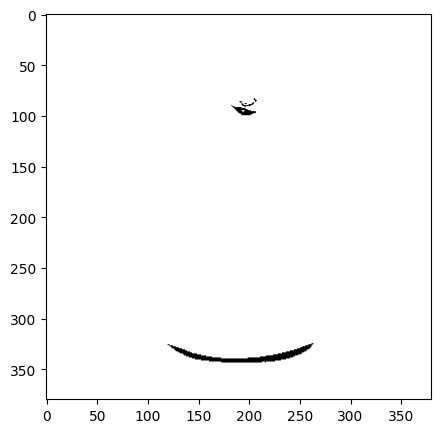

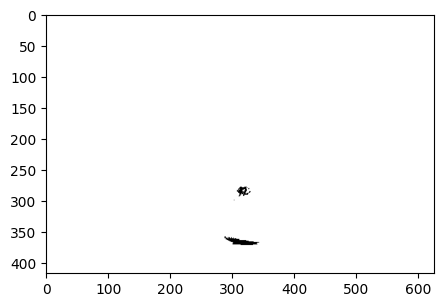

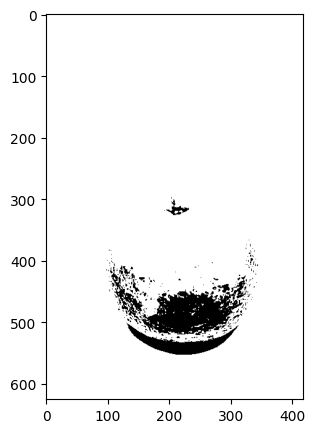

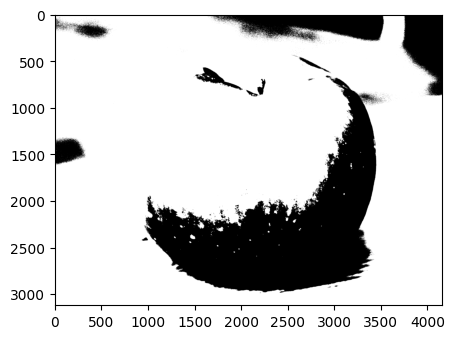

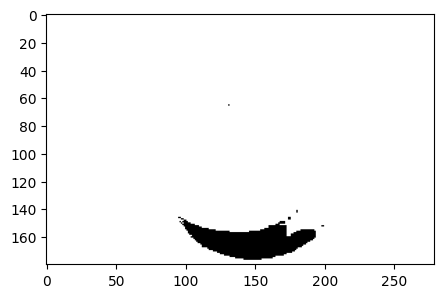

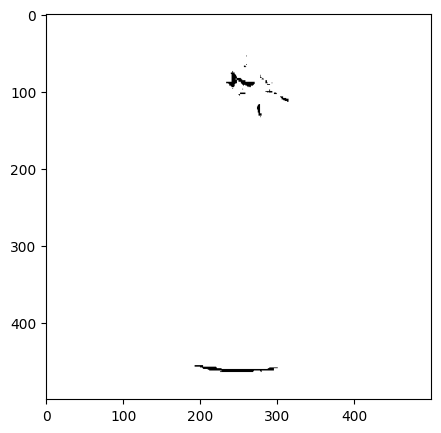

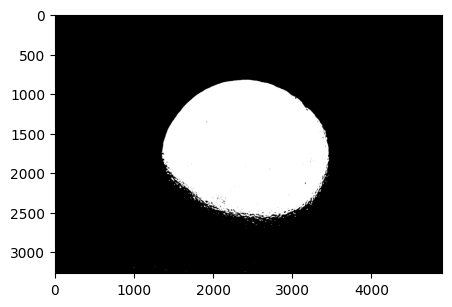

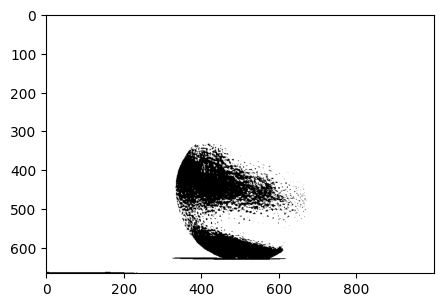

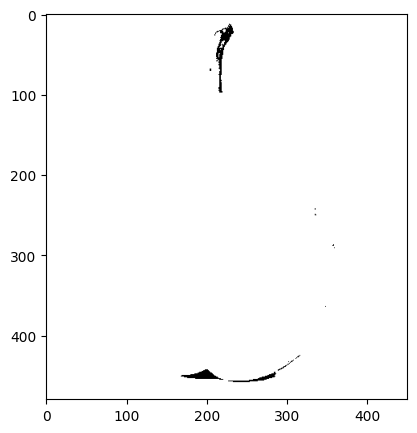

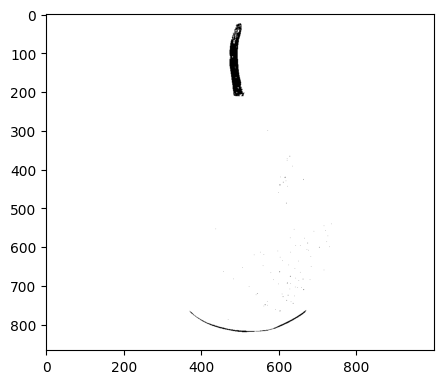

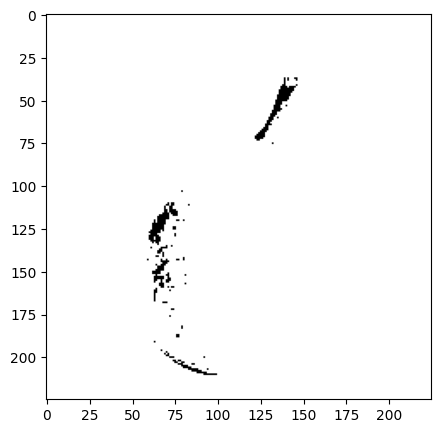

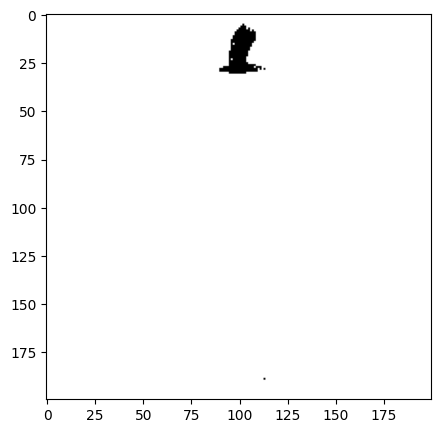

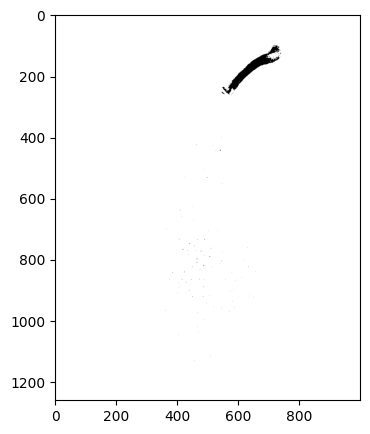

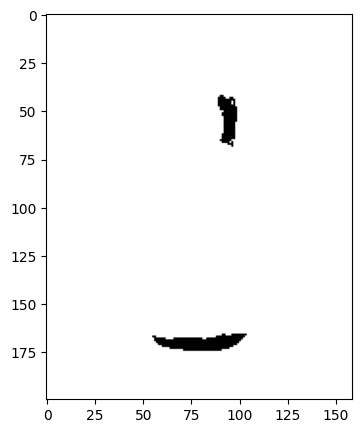

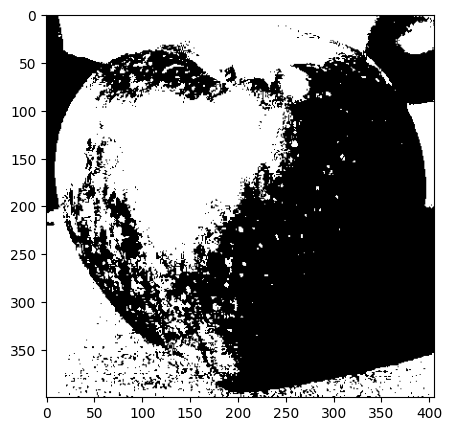

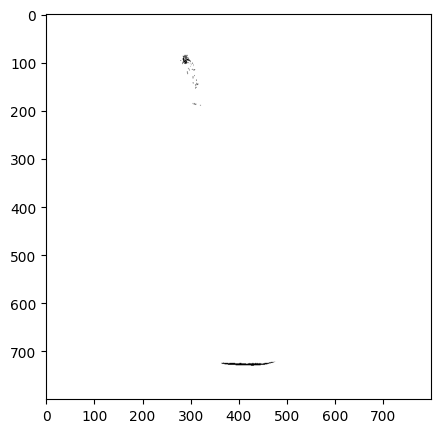

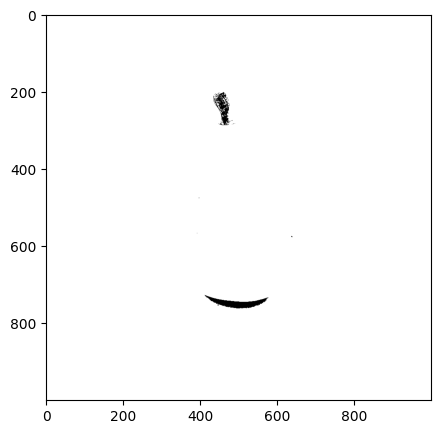

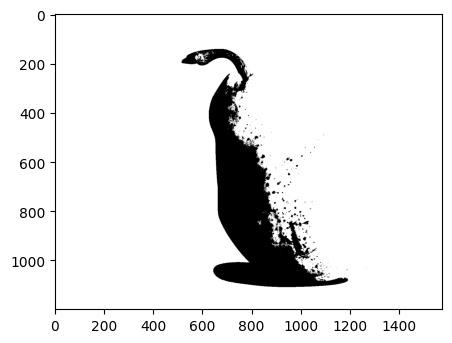

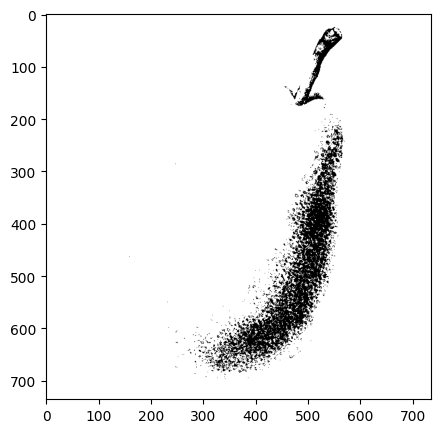

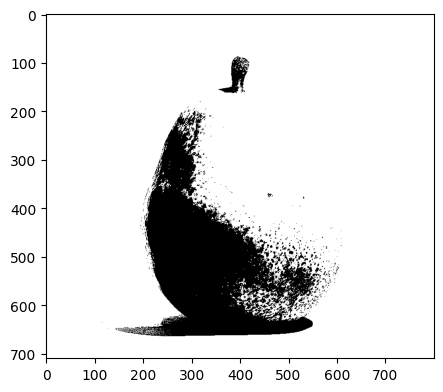

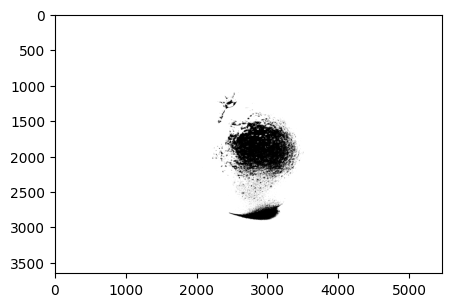

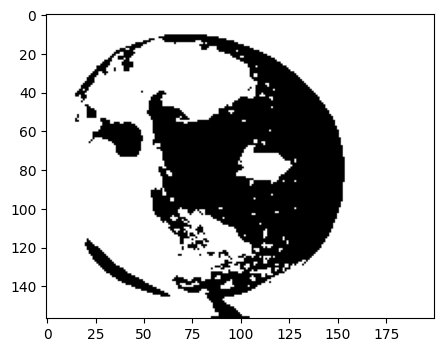

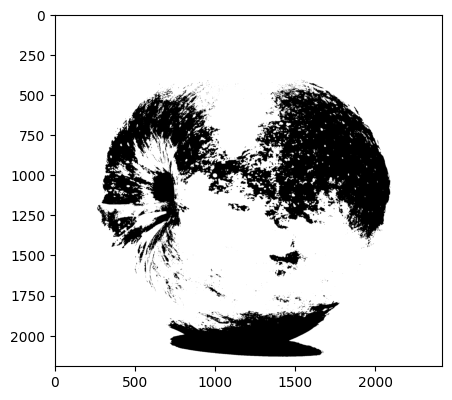

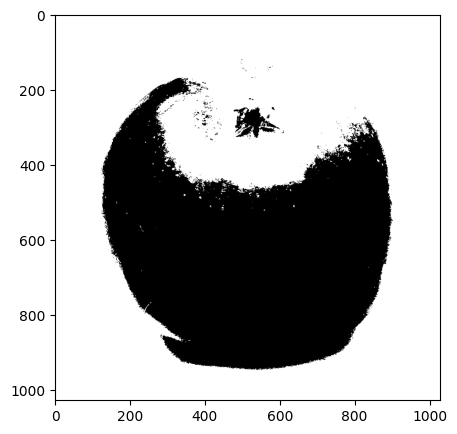

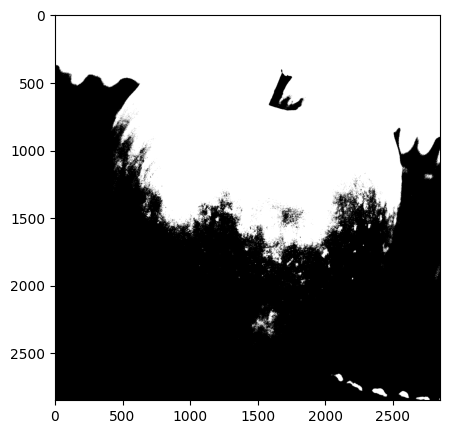

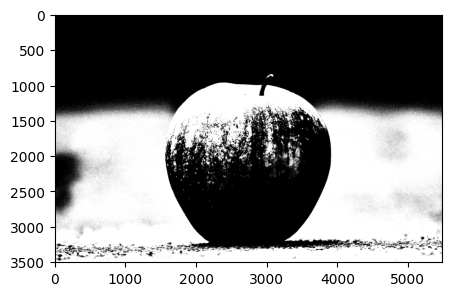

In [107]:
threshold_value = 100
for file in processed:
    image = cv2.imread(file)
    gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, bin = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)
    fig, ax = plt.subplots(figsize = (5,5))
    ax.imshow(bin, cmap='gray')
    plt.show()